In [35]:
import pandas as pd
import matplotlib.pyplot as plt
unbsw_dataset = pd.read_csv("../../Boun_Project/verisetleri/unsw_nb15/UNSW_NB15_training-set.csv")

In [36]:
unbsw_dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


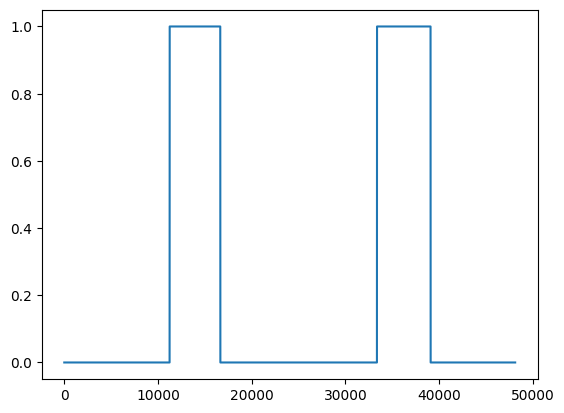

In [37]:
new_data = pd.concat([unbsw_dataset[unbsw_dataset.attack_cat == 'Normal'], 
                      unbsw_dataset[unbsw_dataset.attack_cat == 'Exploits']], axis = 0).reset_index(drop=True)

new_data = new_data.sort_values(by='id').reset_index(drop=True)
df = pd.concat([new_data.iloc[15000:, :], new_data.iloc[:15000, :]], axis=0).reset_index(drop=True)

plt.plot([i for i in range(len(df.label))], df.label)

In [38]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,32395,0.001102,udp,dns,CON,2,2,130,162,2722.323026,...,1,1,0,0,0,5,2,0,Normal,0
1,32396,0.018855,tcp,-,FIN,16,18,1540,1644,1750.198894,...,1,6,0,0,0,8,6,0,Normal,0
2,32397,0.053485,tcp,-,FIN,44,46,2766,24004,1664.017991,...,1,2,0,0,0,14,12,0,Normal,0
3,32398,0.001019,udp,dns,CON,2,2,146,178,2944.062924,...,1,1,0,0,0,3,2,0,Normal,0
4,32399,1.005058,tcp,http,FIN,12,18,1580,10168,28.854055,...,1,1,0,0,1,3,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48127,32390,0.004110,tcp,http,FIN,8,10,1040,824,4136.252944,...,1,2,0,0,1,12,1,0,Normal,0
48128,32391,0.001188,udp,dns,CON,2,2,146,178,2525.252598,...,2,2,0,0,0,14,3,0,Normal,0
48129,32392,0.105017,tcp,-,FIN,88,164,5488,192828,2390.089248,...,1,7,0,0,0,14,11,0,Normal,0
48130,32393,0.001153,udp,dns,CON,2,2,146,178,2601.907957,...,1,1,0,0,0,1,4,0,Normal,0


In [39]:
from genetic_algo_helpers import eliminate_nan_cols
df = eliminate_nan_cols(df)

In [40]:
from helpers import *


In [41]:
df = df.rename({'label':"Label"}, axis=1)


In [42]:
df = df.select_dtypes(['number'])


In [46]:
iqr_coefficients = [1.0, 1.25, 1.5, 1,75, 2.0, 3.0, 5.0, 10.0]
window_sizes = [20, 50, 100]
simulation_datasets = {"exploit": df.iloc[:,3:]}

In [47]:
import warnings
warnings.filterwarnings('ignore')

final_results = {}
counter: int = 0
for df_name, dataframe in simulation_datasets.items():
    for window_size in window_sizes:
        final_results[df_name] = {"accuracy" : [], "f1-score": []}
        for iqr_coeff in iqr_coefficients:
            counter += 1
            print(f"Processing {df_name} : {iqr_coeff} : %{(counter * 100)/(len(iqr_coefficients) * len(window_sizes) * len(simulation_datasets.keys()))}")
            #initialize necessary items for calculations
            accuracy_list, f1_score_list, mp_label_df = [], [], pd.DataFrame({"W_Label": [], "mp_scores": []})
            df = dataframe.copy()
            mp_label_df["W_Label"] = calculate_matrix_profile_window_labels(df, windowSize=window_size, labelIdx=-1)

            for feature in df.columns[1:-1]:
                mp_res = calculate_matrix_profile(df, feature, window_size)
                mp_label_df["mp_scores"] = mp_res["mp"]
                results = matrix_profile_threshold_predictions(mp_label_df, iqr_coefficient=iqr_coeff, verbose=False)

                accuracy_list.append((feature, results["accuracy"]))
                f1_score_list.append((feature, results['macro avg']["f1-score"]))
                mp_label_df["mp_scores"] = 0

            final_results[df_name]["accuracy"].append((sorted(accuracy_list, key=lambda x:x[1], reverse=True)[0], f"iqr_{iqr_coeff}_w_{window_size}"))
            final_results[df_name]["f1-score"].append((sorted(f1_score_list, key=lambda x:x[1], reverse=True)[0], f"iqr_{iqr_coeff}_w_{window_size}"))

Processing exploit : 1.0 : %3.7037037037037037
Processing exploit : 1.25 : %7.407407407407407
Processing exploit : 1.5 : %11.11111111111111
Processing exploit : 1 : %14.814814814814815
Processing exploit : 75 : %18.51851851851852
Processing exploit : 2.0 : %22.22222222222222
Processing exploit : 3.0 : %25.925925925925927
Processing exploit : 5.0 : %29.62962962962963
Processing exploit : 10.0 : %33.333333333333336
Processing exploit : 1.0 : %37.03703703703704
Processing exploit : 1.25 : %40.74074074074074
Processing exploit : 1.5 : %44.44444444444444
Processing exploit : 1 : %48.148148148148145
Processing exploit : 75 : %51.851851851851855
Processing exploit : 2.0 : %55.55555555555556
Processing exploit : 3.0 : %59.25925925925926
Processing exploit : 5.0 : %62.96296296296296
Processing exploit : 10.0 : %66.66666666666667
Processing exploit : 1.0 : %70.37037037037037
Processing exploit : 1.25 : %74.07407407407408
Processing exploit : 1.5 : %77.77777777777777
Processing exploit : 1 : %81.

KeyboardInterrupt: 

In [ ]:
for df_name in simulation_datasets:
    print(f"Best Results For {df_name.upper()}\nACCURACY:  {sorted(final_results[f'{df_name}']['accuracy'], key=lambda x:x[0][1], reverse=True)[:1]}")
    print(f"F1-SCORE:  {sorted(final_results[f'{df_name}']['f1-score'], key=lambda x:x[0][1], reverse=True)[:1]}")

Best Results For EXPLOIT
ACCURACY:  [(('sload', 0.7643703287323299), 'iqr_1.0_w_100')]
F1-SCORE:  [(('dload', 0.2390510948905109), 'iqr_1.0_w_100')]


In [ ]:
percentile_ranges = [70, 75, 80, 85, 90]
window_sizes = [20, 50, 100]
simulation_datasets = {"exploit": df.iloc[:,3:]}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

final_results = {}
counter: int = 0
for df_name, dataframe in simulation_datasets.items():
    for window_size in window_sizes:
        final_results[df_name] = {"accuracy" : [], "f1-score": []}
        for percentile in percentile_ranges:
            counter += 1
            print(f"Processing {df_name} : {percentile} : %{(counter * 100)/(len(percentile_ranges) * len(window_sizes) * len(simulation_datasets.keys()))}")
            #initialize necessary items for calculations
            accuracy_list, f1_score_list, mp_label_df = [], [], pd.DataFrame({"W_Label": [], "mp_scores": []})
            df = dataframe.copy()
            mp_label_df["W_Label"] = calculate_matrix_profile_window_labels(df, windowSize=window_size, labelIdx=-1)

            for feature in df.columns[1:-1]:
                mp_res = calculate_matrix_profile(df, feature, window_size)
                mp_label_df["mp_scores"] = mp_res["mp"]
                results = matrix_profile_threshold_predictions(mp_label_df, mp_threshold_percentile=percentile, verbose=False)

                accuracy_list.append((feature, results["accuracy"]))
                f1_score_list.append((feature, results['macro avg']["f1-score"]))
                mp_label_df["mp_scores"] = 0

            final_results[df_name]["accuracy"].append((sorted(accuracy_list, key=lambda x:x[1], reverse=True)[0], f"percentile_{percentile}_w_{window_size}"))
            final_results[df_name]["f1-score"].append((sorted(f1_score_list, key=lambda x:x[1], reverse=True)[0], f"percentile_{percentile}_w_{window_size}"))

Processing exploit : 70 : %6.666666666666667
Processing exploit : 75 : %13.333333333333334
Processing exploit : 80 : %20.0
Processing exploit : 85 : %26.666666666666668
Processing exploit : 90 : %33.333333333333336


KeyboardInterrupt: 

In [ ]:
for df_name in simulation_datasets:
    print(f"Best Results For {df_name.upper()}\nACCURACY:  {sorted(final_results[f'{df_name}']['accuracy'], key=lambda x:x[0][1], reverse=True)[:1]}")
    print(f"F1-SCORE:  {sorted(final_results[f'{df_name}']['f1-score'], key=lambda x:x[0][1], reverse=True)[:1]}")

In [ ]:
thresholds = {"0.5": 0.5, "1":1.0, "1.5":1.5, "2":2.0}
window_sizes = [20, 50, 100]
simulation_datasets = {"exploit": df.iloc[:,3:]}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

final_results = {}
counter: int = 0
for df_name, dataframe in simulation_datasets.items():
    final_results[df_name] = {"accuracy": [], "f1-score":[]}
    for window_size in window_sizes:
        for threshold in thresholds.values():
            counter += 1
            print(f"Processing {df_name} : {window_size} : {threshold} : %{(counter * 100)/(len(window_sizes) * len(thresholds) * len(simulation_datasets.keys()))}")
            #initialize necessary items for calculations
            accuracy_list, f1_score_list, mp_label_df = [], [], pd.DataFrame({"W_Label": [], "mp_scores": []})
            df = dataframe.copy()
            mp_label_df["W_Label"] = calculate_matrix_profile_window_labels(df, windowSize=window_size, labelIdx=-1)

            for feature in df.columns[1:-1]:
                mp_res = calculate_matrix_profile(df, feature, window_size)
                mp_label_df["mp_scores"] = mp_res["mp"]
                results = matrix_profile_threshold_predictions(mp_label_df, mp_threshold=threshold, verbose=False)

                accuracy_list.append((feature, results["accuracy"]))
                f1_score_list.append((feature, results['macro avg']["f1-score"]))
                mp_label_df["mp_scores"] = 0

            final_results[df_name]["accuracy"].append((sorted(accuracy_list, key=lambda x:x[1], reverse=True)[0], f"th_{threshold}_w_{window_size}"))
            final_results[df_name]["f1-score"].append((sorted(f1_score_list, key=lambda x:x[1], reverse=True)[0], f"th_{threshold}_w_{window_size}"))

In [ ]:
for df_name in simulation_datasets:
    print(f"Best Results For {df_name.upper()}\nACCURACY:  {sorted(final_results[f'{df_name}']['accuracy'], key=lambda x:x[0][1], reverse=True)[:1]}")
    print(f"F1-SCORE:  {sorted(final_results[f'{df_name}']['f1-score'], key=lambda x:x[0][1], reverse=True)[:1]}")

In [ ]:
n_estimators = [50, 100, 200]
contaminations = ["auto", 0.1, 0.2]
window_sizes = [20, 50, 100]
simulation_datasets = {"exploit": df.iloc[:,3:]}

In [ ]:
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

final_results = {}
counter: int = 0
for df_name, dataframe in simulation_datasets.items():
    for window_size in window_sizes:
        final_results[df_name] = {"accuracy" : [], "f1-score": []}
        for estimator in n_estimators:
            for contamination in contaminations:
                counter += 1
                print(f"Processing {df_name} : nest_{estimator} : c_{contamination} : %{(counter * 100)/(len(n_estimators) * len(contaminations) * len(window_sizes) * len(simulation_datasets.keys()))}")
                accuracy_list, f1_score_list = [], []
                df = dataframe.copy()

                for feature in df.columns[1:-1]:
                    mp_label_df = pd.DataFrame({"mp_scores": []})
                    mp_res = calculate_matrix_profile(df, feature, window_size)
                    mp_label_df["mp_scores"] = mp_res["mp"]
                    mp_label_df = isolation_forest_predictions(mp_label_df, n_est=estimator, cont=contamination)
                    mp_label_df["Preds"] = mp_label_df["anomaly"].apply(lambda x: 1 if x == -1 else 0)
                    mp_label_df["W_Label"] = calculate_matrix_profile_window_labels(df, windowSize=window_size, labelIdx=-1)

                    results = classification_report(mp_label_df["W_Label"], mp_label_df["Preds"], output_dict=True)


                    accuracy_list.append((feature, results["accuracy"]))
                    f1_score_list.append((feature, results['macro avg']["f1-score"]))
                    del mp_label_df

                final_results[df_name]["accuracy"].append((sorted(accuracy_list, key=lambda x:x[1], reverse=True)[0], f"nest_{estimator}_cont_{contamination}_w_{window_size}"))
                final_results[df_name]["f1-score"].append((sorted(f1_score_list, key=lambda x:x[1], reverse=True)[0], f"nest_{estimator}_cont_{contamination}_w_{window_size}"))

In [ ]:
for df_name in simulation_datasets:
    print(f"Best Results For {df_name.upper()}\nACCURACY:  {sorted(final_results[f'{df_name}']['accuracy'], key=lambda x:x[0][1], reverse=True)[:1]}")
    print(f"F1-SCORE:  {sorted(final_results[f'{df_name}']['f1-score'], key=lambda x:x[0][1], reverse=True)[:1]}")

In [ ]:
skew_thresholds = [10, 15, 20]
kurtosis_thresholds = [10, 15, 20]
window_sizes = [20, 50, 100]
simulation_datasets = {"exploit": df.iloc[:,3:]}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

final_results = {}
counter: int = 0
for df_name, dataframe in simulation_datasets.items():
    for window_size in window_sizes:
        final_results[df_name] = {"accuracy" : [], "f1-score": []}
        for skew_th in skew_thresholds:
            for kurtosis_th in kurtosis_thresholds:
                counter += 1
                print(f"Processing {df_name} : {window_size}:{skew_th}:{kurtosis_th} : %{(counter * 100)/(len(skew_thresholds) * len(kurtosis_thresholds) * len(window_sizes) * len(simulation_datasets.keys()))}")

                accuracy_list, f1_score_list= [], []
                df = dataframe.copy()

                for feature in df.columns[1:-1]:
                    lmom_df = calculate_lmom_df(df, feature, window_size)
                    results = lmom_predictions(lmom_df, skew_th, kurtosis_th)

                    accuracy_list.append((feature, results["accuracy"]))
                    f1_score_list.append((feature, results['macro avg']["f1-score"]))

                final_results[df_name]["accuracy"].append((sorted(accuracy_list, key=lambda x:x[1], reverse=True)[0], f"sk_{skew_th}_kurth_{kurtosis_th}_w_{window_size}"))
                final_results[df_name]["f1-score"].append((sorted(f1_score_list, key=lambda x:x[1], reverse=True)[0], f"sk_{skew_th}_kurth_{kurtosis_th}_w_{window_size}"))

In [ ]:
for df_name in simulation_datasets:
    print(f"Best Results For {df_name.upper()}\nACCURACY:  {sorted(final_results[f'{df_name}']['accuracy'], key=lambda x:x[0][1], reverse=True)[:1]}")
    print(f"F1-SCORE:  {sorted(final_results[f'{df_name}']['f1-score'], key=lambda x:x[0][1], reverse=True)[:1]}")